In [52]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [53]:
X = load_boston().data
Y = load_boston().target

In [54]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [55]:
clf = SGDRegressor()
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

23.00034360224337


In [56]:
df=pd.DataFrame(X)
#some intuition
df[13]=df[10]//df[12]  #here we set a column 13 such that df[13]=Boston_data['Medv']//Boston_data['B']
X=df.as_matrix()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,1.0
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,0.0
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,0.0
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,-1.0
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,-1.0


In [57]:
#Splitting whole data into train and test
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=4)

# applying column standardization on train and test data

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

df_train=pd.DataFrame(X_train)
df_train['price']=y_train
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,price
0,-0.425469,-0.470768,-0.954686,-0.231455,-0.919581,0.215100,-0.747410,0.454022,-0.764468,-0.976012,0.005460,0.441889,-0.444819,-0.100764,23.9
1,-0.426323,2.992576,-1.330157,-0.231455,-1.227311,-0.883652,-1.691588,3.163428,-0.651568,-0.464548,1.616046,0.287498,-0.666438,-0.195005,18.2
2,-0.385190,-0.470768,-0.705828,4.320494,-0.423795,-0.125423,0.818985,-0.353904,-0.199967,-0.623278,-0.500725,0.423713,1.226505,-0.100764,21.7
3,-0.249268,-0.470768,-0.423497,-0.231455,-0.158805,-0.228336,1.021567,-0.021755,-0.651568,-0.623278,1.155878,-1.185126,1.068407,-0.006522,13.5
4,-0.365945,0.395068,-1.030363,-0.231455,0.157472,3.102729,-0.060078,-0.646202,-0.538668,-0.876071,-2.525462,0.306551,-0.752545,0.087719,50.0


In [58]:
#SGD implementation for linear regression
#function having parameter X_train,y_train,no of iteration,learning rate r
#intialising no of iteration=100,learning rate =0.01
#batch size=20



W,B,iteration,lr_rate,k=np.zeros(shape=(1,14)),0,750,0.01,25 #intialise W and B to zero

while iteration>=0:
    w,b,temp_vectors,temp_intercept=W,B,np.zeros(shape=(1,14)),0
    data=df_train.sample(25) #sampling random k=batch size=20 data
    x=np.array(data.drop('price',axis=1))
    y=np.array(data['price'])
    
    for i in range(k):
        temp_vectors+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt w dl/dw=1/k(-2x)*(y-wTx-b)
        temp_intercept+=(-2)*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt b dl/db=1/k(-2)*(y-wTx-b)
        
    W=(w-lr_rate*(temp_vectors)/k)
    B=(b-lr_rate*(temp_intercept)/k)
    
    iteration-=1
    
    
print(W)
print(B)

[[-0.88306127  1.10983464 -0.31906405  1.26577969 -1.48507253  2.22580003
  -0.18915912 -3.01961755  1.86039206 -1.37960624 -1.64084106  0.74067193
  -3.47527654  0.06518038]]
[22.14467274]


In [59]:
#prediction on x_test
#https://www.geeksforgeeks.org/numpy-asscalar-in-python/
y_predic_lr=[]
for i in range(len(X_test)):
    val=np.dot(W,X_test[i])+B  #val= wTx+b
    y_predic_lr.append(np.asscalar(val))

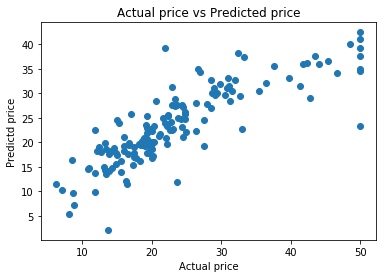

In [60]:
#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_predic_lr)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [61]:
MSE_lr=mean_squared_error(y_test,y_predic_lr)
print('mean squared error =',MSE_lr)

mean squared error = 31.239830632733


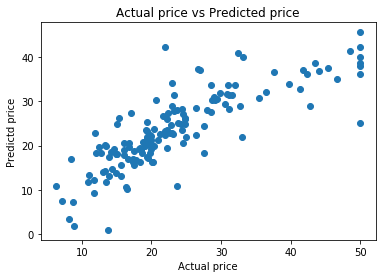

In [62]:
#SGD regression sklearn implementation

#intialising no of iteration=100,eta0=1
#taking t=2 and power_t=1 such that for each iteration eta0=eta0/pow(2,1) ,it means half each times

model=SGDRegressor(learning_rate='constant',eta0=0.01,penalty=None,n_iter=100,max_iter=100)
model.fit(X_train,y_train)
y_pred_sgd=model.predict(X_test)

#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_pred_sgd)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [63]:
MSE_sgd=mean_squared_error(y_test,y_pred_sgd)
print('mean squared error =',MSE_sgd)

mean squared error = 33.529161913896125


In [64]:
#Comparison between weights obtained from own implementation and weights obtained from sgd implementation
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names=['Weight vector manual','Weight vector SGD sklearn']
weight_sgd=model.coef_
for i in range(13):
    x.add_row([W[0][i],weight_sgd[i]])
print(x)

+----------------------+---------------------------+
| Weight vector manual | Weight vector SGD sklearn |
+----------------------+---------------------------+
| -0.8830612711865389  |    -1.3769808057338275    |
|  1.1098346413329043  |     1.2578217208213538    |
| -0.31906404677416117 |    0.22615712805089083    |
|  1.2657796946846447  |     1.6520436404957028    |
| -1.4850725316167526  |    -1.6577036484675904    |
|  2.225800033412804   |     2.2316449407595993    |
| -0.18915911906972485 |    -0.1754401651340977    |
|  -3.019617552643329  |    -3.4309684244613585    |
|  1.8603920616553935  |     3.0164500459120447    |
| -1.3796062365313495  |    -2.2965400786352883    |
| -1.6408410603295547  |    -1.7885105658537956    |
|  0.7406719308170109  |     1.2393999240996039    |
| -3.4752765420614797  |    -3.9580001664848594    |
+----------------------+---------------------------+


In [65]:
#comparison between MSE of own implementation and SGD sklearn implementation
print('MSE of manual implementation = ',MSE_lr)
print('-'*50)
print('MSE of SGD sklearn implementation = ',MSE_sgd)

MSE of manual implementation =  31.239830632733
--------------------------------------------------
MSE of SGD sklearn implementation =  33.529161913896125


In [ ]:
1. After seeing the distribution of Median value of owner-occupied homes in $1000's and 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town we created another column such that values are the ratio of both
2. Then We splitted whole dataset into train and test and then standardised it
3. Then After we then initialised learning rate to constant and equal to 0.01 , no of iteration to 100 and took batch size(k) =20
4. After that we have calculated partial derivative with respect to w and b in each iteration of batch size till wk+1 nearly equal to wk.
5. Then we predicted y_test and plotted scatter plot between actual y and predicted y and then we calculated mean squared error.
6. In our next step we applied SGD regressor in sklearn and compared weight ,mean squared error and scatter plot with own implementation.
   And we observed that weights , scatter plots and mean squared error were nearly equal.